In [16]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D, Dropout, MaxPooling2D

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
num_classes = 2
class LeNet(Sequential):
  def __init__(self, input_shape, nb_classes):
    super().__init__()

    self.add(Conv2D(6, kernel_size = (5, 5), strides = (1, 1), activation = 'relu',
                     input_shape = input_shape, padding = "same"))
    self.add(AveragePooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
    self.add(Conv2D(16, kernel_size = (5, 5), strides = (1, 1), activation = 'relu',
                     padding = 'valid'))
    self.add(AveragePooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
    self.add(Flatten())
    self.add(Dense(120, activation = 'relu'))
    self.add(Dense(84, activation = 'relu'))
    self.add(Dense(nb_classes, activation = 'softmax'))

    self.compile(optimizer = 'adam', loss = categorical_crossentropy, metrics = ['accuracy'])

In [3]:
model = LeNet((100, 100, 3), num_classes)
model.summary()

Model: "le_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 6)       456       
                                                                 
 average_pooling2d (AverageP  (None, 50, 50, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 23, 23, 16)       0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 8464)              0         
                                                                 
 dense (Dense)               (None, 120)               10158

In [5]:
BATCH_SIZE = 32
image_height = 100
image_width = 100
train_dir = "/content/drive/MyDrive/pic/train"
valid_dir = "/content/drive/MyDrive/pic/validation"

train = ImageDataGenerator(rescale = 1./255,
                            rotation_range = 10,
                            width_shift_range = 0.1,
                            height_shift_range = 0.1,
                            shear_range = 0.1,
                            zoom_range = 0.1
)

train_generator = train.flow_from_directory(train_dir, target_size = (image_height, image_width),
                                             color_mode = "rgb",
                                             batch_size = BATCH_SIZE,
                                             seed = 1,
                                             shuffle = True,
                                             class_mode = "categorical")

Found 385 images belonging to 2 classes.


In [6]:
valid = ImageDataGenerator(rescale = 1.0/255.0)
vaild_generator = valid.flow_from_directory(valid_dir, target_size = (image_height, image_width),
                                             color_mode = "rgb",
                                             batch_size = BATCH_SIZE,
                                             seed = 7,
                                             shuffle = True,
                                             class_mode = "categorical")

Found 98 images belonging to 2 classes.


In [11]:
train_num = train_generator.samples
valid_num = vaild_generator.samples

print(train_num, valid_num)

385 98


In [12]:
model.fit(train_generator, epochs = 100, steps_per_epoch = train_num // BATCH_SIZE, validation_data = vaild_generator, validation_steps = valid_num // BATCH_SIZE, verbose = 1)

Epoch 1/100
12/12 [==============================] - 3s 290ms/step - loss: 0.6918 - accuracy: 0.5326 - val_loss: 0.6918 - val_accuracy: 0.5000
Epoch 2/100
12/12 [==============================] - 3s 272ms/step - loss: 0.6952 - accuracy: 0.5184 - val_loss: 0.6888 - val_accuracy: 0.5521
Epoch 3/100
12/12 [==============================] - 3s 286ms/step - loss: 0.6881 - accuracy: 0.5892 - val_loss: 0.7135 - val_accuracy: 0.5000
Epoch 4/100
12/12 [==============================] - 3s 296ms/step - loss: 0.6923 - accuracy: 0.5184 - val_loss: 0.6910 - val_accuracy: 0.5104
Epoch 5/100
12/12 [==============================] - 3s 285ms/step - loss: 0.6889 - accuracy: 0.5286 - val_loss: 0.6810 - val_accuracy: 0.5312
Epoch 6/100
12/12 [==============================] - 3s 271ms/step - loss: 0.6856 - accuracy: 0.5892 - val_loss: 0.7387 - val_accuracy: 0.5104
Epoch 7/100
12/12 [==============================] - 3s 273ms/step - loss: 0.6971 - accuracy: 0.5496 - val_loss: 0.6821 - val_accuracy: 0.6250

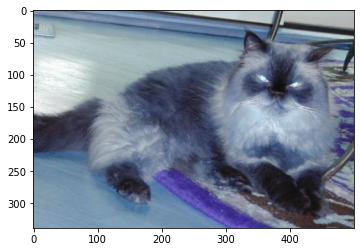

In [14]:
import cv2

img = cv2.imread("/content/drive/MyDrive/pic/test1/test/8101.jpg")
plt.imshow(img)

In [15]:
tes1 = ImageDataGenerator( rescale = 1.0/255. )
test_dat3 = tes1.flow_from_directory('/content/drive/MyDrive/pic/test1', batch_size=20, class_mode='binary', target_size=(100, 100))
y_pre = model.predict(test_dat3)
print((y_pre)*100)

# 0 = 고양이, 1 = 강아지

Found 1 images belonging to 2 classes.
[[52.30674  47.693256]]


In [17]:
num_classes = 2
class AlexNet(Sequential):
  def __init__(self, input_shape, num_classes):
    super().__init__()
    self.add(Conv2D(96, kernel_size = (11, 11), strides = 4,
                     padding = 'valid', activation = 'relu',
                     input_shape = input_shape,
                     kernel_initializer = 'he_normal'))
    self.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2),
                           padding = 'valid', data_format = 'channels_last'))
    
    self.add(Conv2D(256, kernel_size = (5, 5), strides = 1,
                     padding = 'same', activation = 'relu',
                     kernel_initializer = 'he_normal'))
    self.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2),
                           padding = 'valid', data_format = 'channels_last'))
    
    self.add(Conv2D(384, kernel_size = (3, 3), strides = 1,
                     padding = 'same', activation = 'relu',
                     kernel_initializer = 'he_normal'))
    
    self.add(Conv2D(384, kernel_size = (3, 3), strides = 1,
                     padding = 'same', activation = 'relu',
                     kernel_initializer = 'he_normal'))
    
    self.add(Conv2D(256, kernel_size = (3, 3), strides = 1,
                     padding = 'same', activation = 'relu',
                     kernel_initializer = 'he_normal'))
    
    self.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2),
                           padding = 'valid', data_format = 'channels_last'))
    
    self.add(Flatten())
    self.add(Dense(4096, activation = 'relu'))
    self.add(Dense(4096, activation = 'relu'))
    self.add(Dense(1000, activation = 'relu'))
    self.add(Dense(num_classes, activation = 'softmax'))

    self.compile(optimizer = tf.keras.optimizers.Adam(0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [18]:
model = AlexNet((100, 100, 3), num_classes)
model.summary()

Model: "alex_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 23, 23, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 96)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 256)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 5, 5, 384)         885120    
                                                                 
 conv2d_5 (Conv2D)           (None, 5, 5, 384)         132

In [19]:
BATCH_SIZE = 32
image_height = 100
image_width = 100
train_dir = "/content/drive/MyDrive/pic/train"
valid_dir = "/content/drive/MyDrive/pic/validation"

train = ImageDataGenerator(rescale = 1./255,
                            rotation_range = 10,
                            width_shift_range = 0.1,
                            height_shift_range = 0.1,
                            shear_range = 0.1,
                            zoom_range = 0.1
)

train_generator = train.flow_from_directory(train_dir, target_size = (image_height, image_width),
                                             color_mode = "rgb",
                                             batch_size = BATCH_SIZE,
                                             seed = 1,
                                             shuffle = True,
                                             class_mode = "categorical")

valid = ImageDataGenerator(rescale = 1.0/255.0)
vaild_generator = valid.flow_from_directory(valid_dir, target_size = (image_height, image_width),
                                             color_mode = "rgb",
                                             batch_size = BATCH_SIZE,
                                             seed = 7,
                                             shuffle = True,
                                             class_mode = "categorical")

train_num = train_generator.samples
valid_num = vaild_generator.samples

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [20]:
model.fit(train_generator, epochs = 100, steps_per_epoch = train_num // BATCH_SIZE, validation_data = vaild_generator, validation_steps = valid_num // BATCH_SIZE, verbose = 1)

Epoch 1/100
12/12 [==============================] - 5s 304ms/step - loss: 8.3257 - accuracy: 0.5130 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/100
12/12 [==============================] - 4s 301ms/step - loss: 0.6934 - accuracy: 0.5382 - val_loss: 0.6933 - val_accuracy: 0.4792
Epoch 3/100
12/12 [==============================] - 3s 279ms/step - loss: 0.6939 - accuracy: 0.4674 - val_loss: 0.6937 - val_accuracy: 0.4896
Epoch 4/100
12/12 [==============================] - 3s 289ms/step - loss: 0.6938 - accuracy: 0.4873 - val_loss: 0.6932 - val_accuracy: 0.4896
Epoch 5/100
12/12 [==============================] - 3s 290ms/step - loss: 0.6928 - accuracy: 0.5156 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 6/100
12/12 [==============================] - 3s 285ms/step - loss: 0.6926 - accuracy: 0.5184 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 7/100
12/12 [==============================] - 3s 284ms/step - loss: 0.6917 - accuracy: 0.5212 - val_loss: 0.6939 - val_accuracy: 0.5000

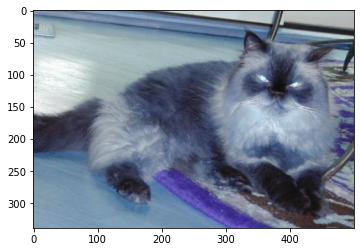

In [21]:
import cv2

img = cv2.imread("/content/drive/MyDrive/pic/test1/test/8101.jpg")
plt.imshow(img)

In [22]:
tes1 = ImageDataGenerator( rescale = 1.0/255. )
test_dat3 = tes1.flow_from_directory('/content/drive/MyDrive/pic/test1', batch_size=20, class_mode='binary', target_size=(100, 100))
y_pre = model.predict(test_dat3)
print((y_pre)*100)

# 0 = 고양이, 1 = 강아지

Found 1 images belonging to 2 classes.
[[47.89007  52.109932]]
